# Leading Scorning Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. There are a lot of leads generated in the initial stage but only a few of them come out as paying customers. The company needs to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc.) in order to get a higher lead conversion.

The problem is to help the comapany select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Data
Leads.csv : The dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

### Approach:
1. Reading and Understanding the Data

- Data Inspection

2. Data Cleaning

3. Data Visulization

- Visualising Numerical Variables and Outlier Tretment
- Visualising Categorical Variables

4. Data Preparation
- Dummy Variable Creation
5. Train-Test Split
6. Feature Scaling
7. Building the Model
- Feature Selection using RFE
- Assessing the Model with statsModels
8. Metrics beyond simply Accuracy
9. Plotting the ROC Curve
10. Finding Optimal Cutoff Point
- Classification Report

11. Precision and Recall

12. Making Prediction on the Test Set
- Classification Report
13. Assigning Lead Score
14. Determining Feature Importance
15. Conclusion

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding the Data

In [25]:
df_leads_original = pd.read_csv('Leads.csv')
# now get copy for keep the original 
df_leads = df_leads_original.copy()
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection

In [26]:
df_leads.shape

(9240, 37)

In [27]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [28]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Cleaning 

In [29]:
df_leads.loc[df_leads.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


No duplicate in the data.

In [30]:
# To check for duplicates in columns
print(sum(df_leads.duplicated(subset = 'Lead Number')))
print(sum(df_leads.duplicated(subset = 'Prospect ID')))

0
0


This columns are just the indication of the ID and each row is unique and is not important from analysis point of view. So drop this two column

In [31]:
df_leads = df_leads.drop(['Lead Number', 'Prospect ID'],1)

In [32]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Now by evaluating the data we find that there are 'select' value in many columns. This refers to that person did not select any option for the given field. So we replace it with NAN/Null value.

In [33]:
# converting select value with NaN
df_leads = df_leads.replace('Select', np.nan)

In [34]:
# Finding % of null value in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

We'll drop columns with more than 55% of missing values as it does not make sense to impute these many values.

In [35]:
# To drop columns with more than 50% of missing values as it does not make sense to impute these many values
df_leads = df_leads.drop(df_leads.loc[:,list(round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)>55)].columns, 1)

for other columns, we have to work on column by column basis

- For categorical variables, we'll analyse the count/percentage plots.
- For numerical variable, we'll describe the variable and analyse the box plots

In [36]:
# Function for percentage plots
def percent_plot(var):
    values = (df_leads[var].value_counts(normalize = True)*100)
    plt_p = values.plot.bar(color = sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')
    

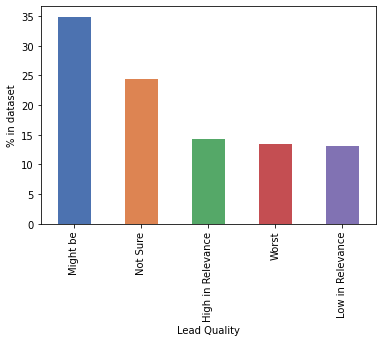

In [37]:
# For Lead Quality
percent_plot('Lead Quality')

Null values in the 'Lead Quality' column can be imputed with the value 'Not Sure' as we can assume that not filling in a column means the employee does not know or is not sure about the option.

In [38]:
df_leads['Lead Quality'] = df_leads['Lead Quality'].replace(np.nan, 'Not Sure')

In [39]:
df_leads['Lead Quality'].head(20)

0     Low in Relevance
1             Not Sure
2             Might be
3             Not Sure
4             Might be
5             Not Sure
6     Low in Relevance
7             Not Sure
8             Not Sure
9             Not Sure
10            Might be
11            Not Sure
12            Might be
13            Not Sure
14            Not Sure
15            Might be
16            Not Sure
17            Might be
18            Not Sure
19               Worst
Name: Lead Quality, dtype: object

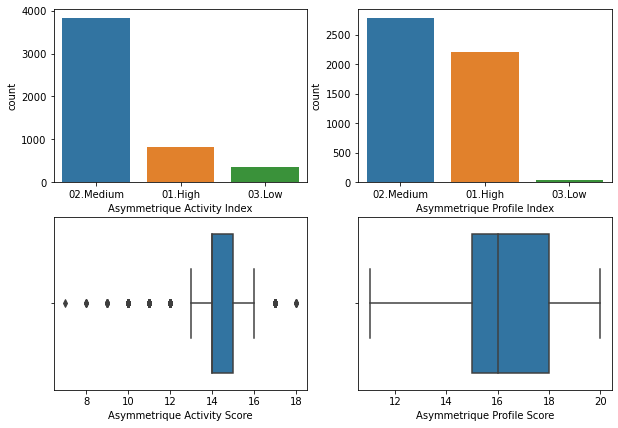

In [40]:
# For 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
asym_list = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
plt.figure(figsize=(10, 7))
for var in asym_list:
    plt.subplot(2,2,asym_list.index(var)+1)
    if 'Index' in var:
        sns.countplot(df_leads[var])
    else:
        sns.boxplot(df_leads[var])
plt.show()

In [41]:
# To describe numerical variables
df_leads[asym_list].describe()

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.000000,5022.000000
mean,14.306252,16.344883
std,1.386694,1.811395
min,7.000000,11.000000
25%,14.000000,15.000000
50%,14.000000,16.000000
75%,15.000000,18.000000
max,18.000000,20.000000


These four variable have more than 45% missing values and it can be seen from the plots that there is a lot of variation in them. So, it's not a good idea to impute 45% of the data. Even if we impute with mean/median for numerical variables, these values will not have any significant importance in the model. We'll have to drop these variables.

In [42]:
df_leads = df_leads.drop(asym_list,1)

In [43]:
# To get percentage of null values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

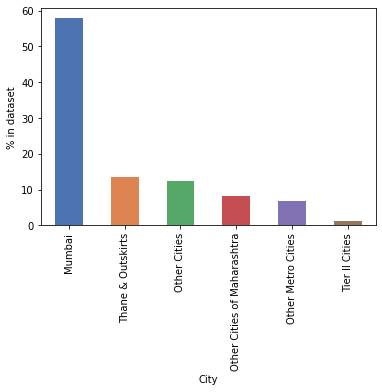

In [44]:
# now for 'City'
percent_plot('City')

From the graph we can see that around 60% values are with 'Mumbai'. So we replace missing values with 'Mumbai

In [45]:
df_leads['City'] = df_leads['City'].replace(np.nan, 'Mumbai')

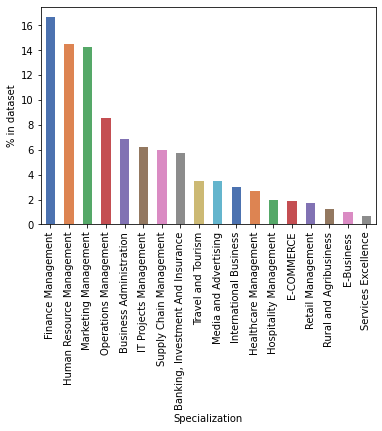

In [46]:
# for 'Specialization'
percent_plot('Specialization')

There are a lot of different specializations and it's not accurate to directly impute with the mean. It is possible that the person does not have a specialization or his/her specialization is not in the options. We can create a new column for that.

In [47]:
df_leads['Specialization'] = df_leads['Specialization'].replace(np.nan, 'Others')

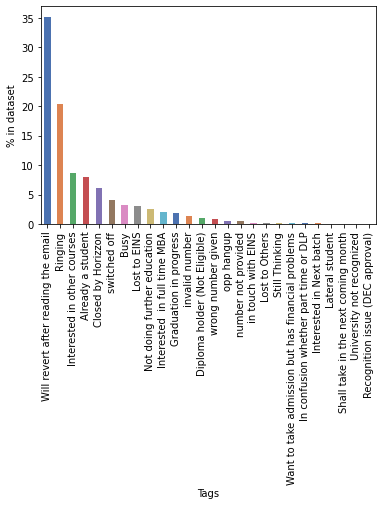

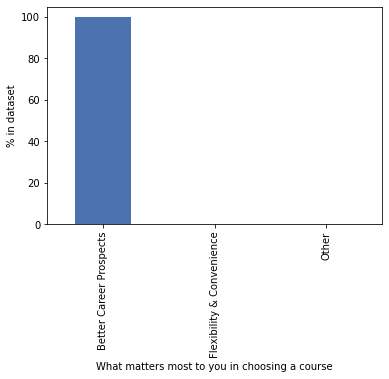

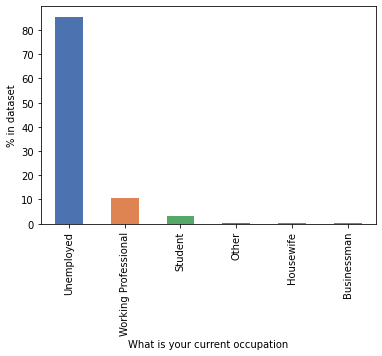

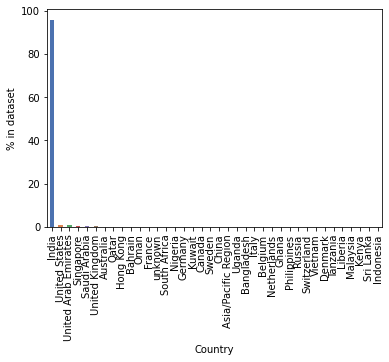

In [48]:
# For 'Tags', 'What matters most to you in choosing a course', 'What is your current occupation' and 'Country'
var_list = ['Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country']

for var in var_list:
    percent_plot(var)
    plt.show()

In all these categorical variables, one value is clearly more frequent than all others. So it makes sense to impute with the most frequent values.

In [49]:
# To impute with the most frequent value
for var in var_list:
    top_frequent = df_leads[var].describe()['top']
    df_leads[var] = df_leads[var].replace(np.nan, top_frequent)

In [50]:
# To get percentage of null values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

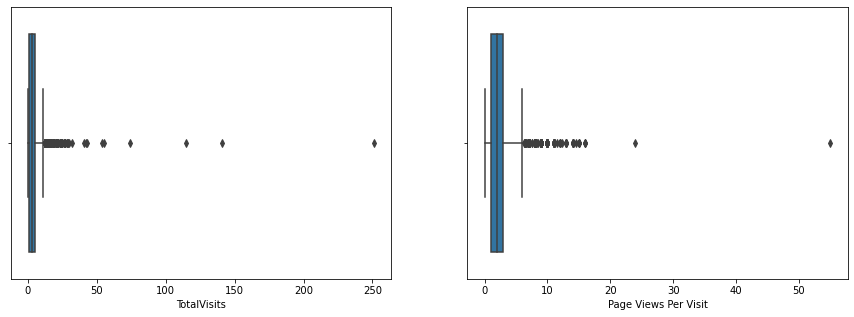

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [51]:
# For 'TotalVisits' and 'Page views per visit'
visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize = (15, 5))
for var in visit_list:
    plt.subplot(1,2,visit_list.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()
df_leads[visit_list].describe()

From the above analysis, it can be seen that there is a lot of variation in both of the variables. As the percentage of missing values for both of them are less than 2%, it is better to drop the rows containing missing values.

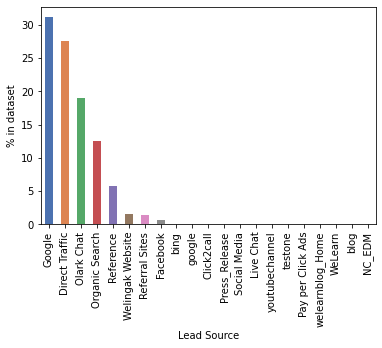

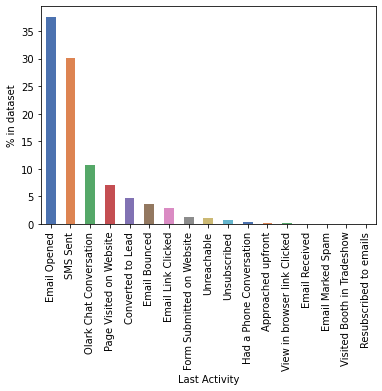

In [52]:
# For 'Lead Source' and 'Last Activity'
var_list = ['Lead Source', 'Last Activity']

for var in var_list:
    percent_plot(var)
    plt.show()

we'll drop the rows containing any missing missing values for above four variables.

In [53]:
# To drop the rows containing missing values
df_leads.dropna(inplace = True)

In [54]:
# To get percentage of null values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

There are no missing value present in the data.

# Data Visulization

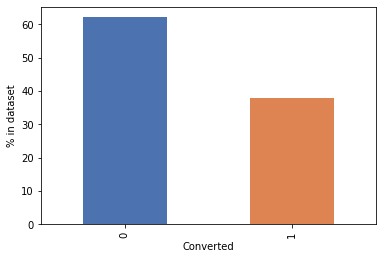

In [55]:
# For the target variable 'Converted'
# Checking for imbalance
percent_plot('Converted')

In [56]:
(sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100

37.85541106458012

37.8% leads are converted out of 100%. So there is no imbalance in the data. 

### Visualising Numerical Variables and Outlier Treatment

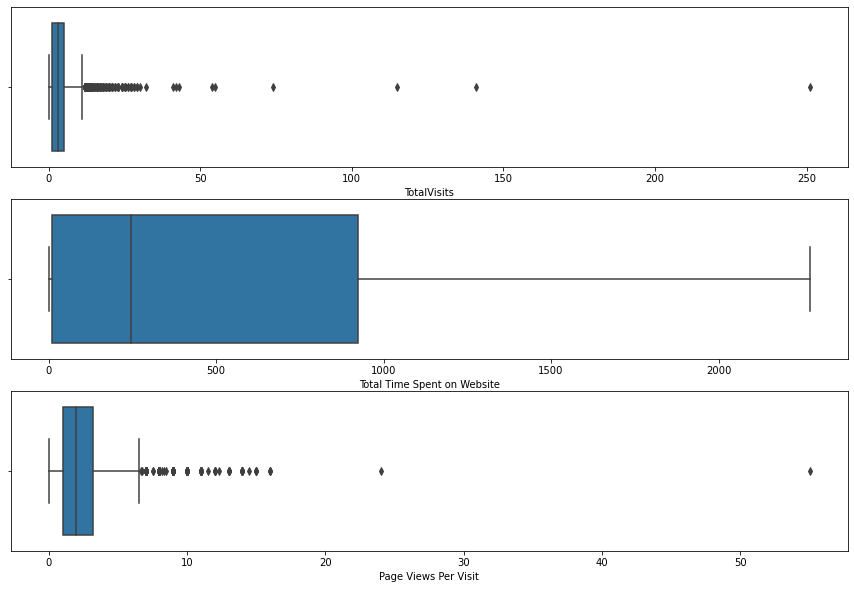

In [57]:
# Boxplots
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()

In [58]:
df_leads[num_var].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000


For the boxplots, we can see that there are outliers present in the variables.

- For 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we should cap these outliers at 95% value.
- There are no significant outliers in 'Total Time Spent on Website'
- For 'Page Views per Visit', Similar to 'TotalVisits', We should cap outliers at 95% value. We don't need to cap at 5% as the minimum value at 5% as the mininmum value at 5% value are for all the variables.

In [59]:
# Outlier treatment
percentile = df_leads['TotalVisits'].quantile([0.95]).values
df_leads['TotalVisits'][df_leads['TotalVisits'] >= percentile[0]] = percentile[0]

percentile = df_leads['Page Views Per Visit'].quantile([0.95]).values
df_leads['Page Views Per Visit'][df_leads['Page Views Per Visit'] >= percentile[0]] = percentile[0]

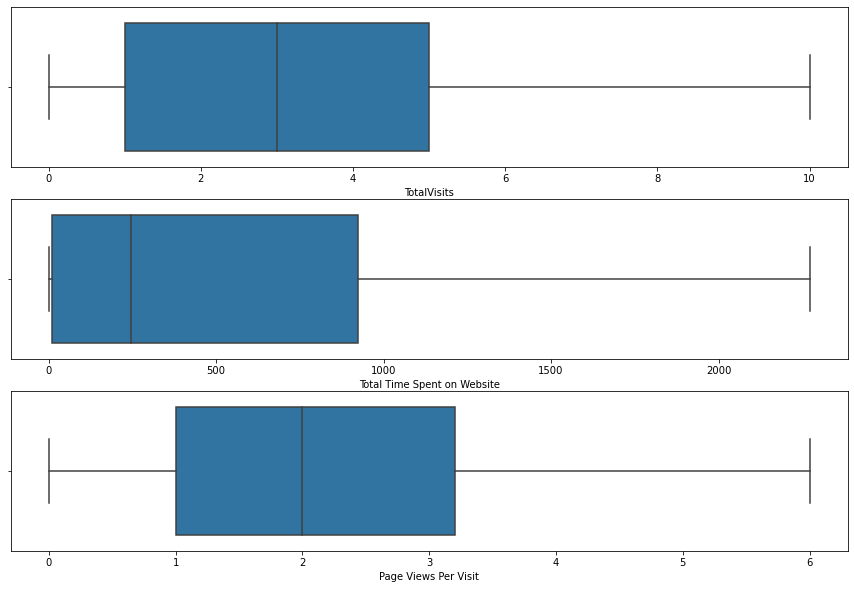

In [60]:
# Plot Boxplots to verify 
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()

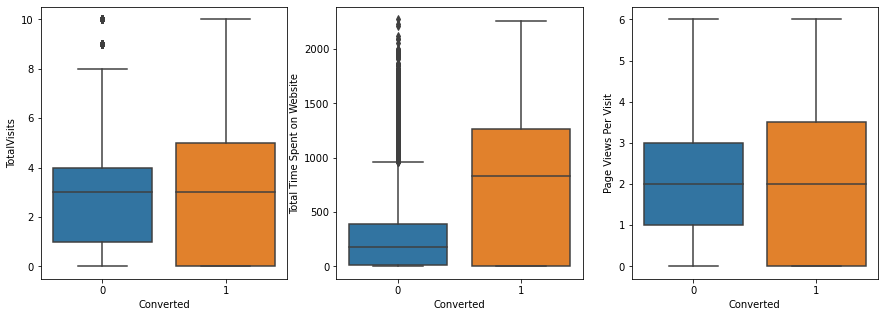

In [61]:
# To plot numerical variables against target variable to analyse relations
plt.figure(figsize=(15, 5))
for var in num_var:
    plt.subplot(1,3,num_var.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = df_leads)
plt.show()

##### Observations:
- 'TotalVisits' has same median values for both outputs of leads. No conclusion can be drwan from this.
- People spending more time on the website are more likely to be converted. This is also aligned with our general knowledge.
- 'Page Views Per Visit' also has same median values for both outputs of leads. Hence, inconclusive.

### Visualising Categorical Variables

In [62]:
# Categorical variables
cat_var = list(df_leads.columns[df_leads.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

We saw % plots for categorical variables while cleaning the data. Here, we'll see these plots with respect to target variable 'Converted'

In [63]:
# Functions to plot countplots for categorical variables with target variable

# for single plot
def plot_cat_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = 'Converted', data = df_leads)
    plt.xticks(rotation = 90)
    plt.show()
    
# for multiple plots
def plot_cat_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize = (20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = 'Converted', data = df_leads)
        plt.xticks(rotation = 90)
    plt.show()

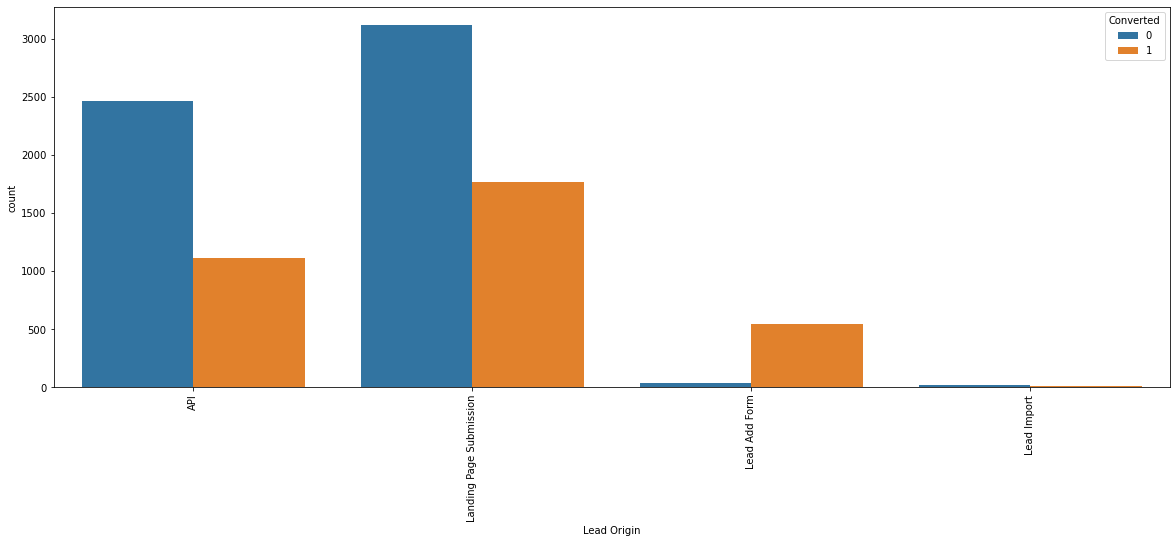

In [64]:
plot_cat_var(cat_var[0])

Observation for **Lead Origin :**
'API' and 'Landing Oage Submission' generate the most leads but have less conversion rates of around 30%. Whereas, 'Lead Add Form' generates less leads but conversion rate is great. We should **try to increase conversion rate for 'API' and 'Landing Page Submission', and increase leads generation using 'Lead Add Form'**'Lead import' does not seem very significant.


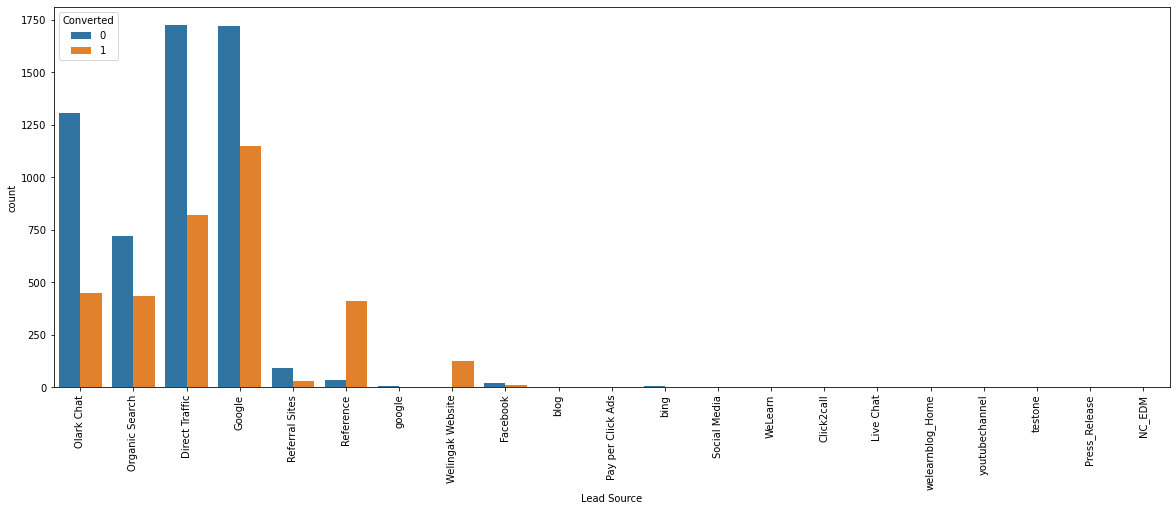

In [65]:
plot_cat_var(cat_var[1])

Observations for 'Lead Source':

- Spelling error : We've to change 'google' to 'Google'
- As it can be seen from the graph, number of leads generated by many of the sources are negligible. There are sufficient numbers till Facebook. We can convert all others in one single category of 'Others'.
- 'Direct Traffic' and 'Google' generate maximum number of leads while maximum conversion rate is achieved through 'Reference' and 'Welingak Website'.

In [66]:
# To correct spelling error
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['google'], 'Google')

In [67]:
categories = df_leads['Lead Source'].unique()
categories

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

We require first eight categories.


In [68]:
# To create 'others'
df_leads['Lead Source'] = df_leads['Lead Source'].replace(categories[8:], 'Others')

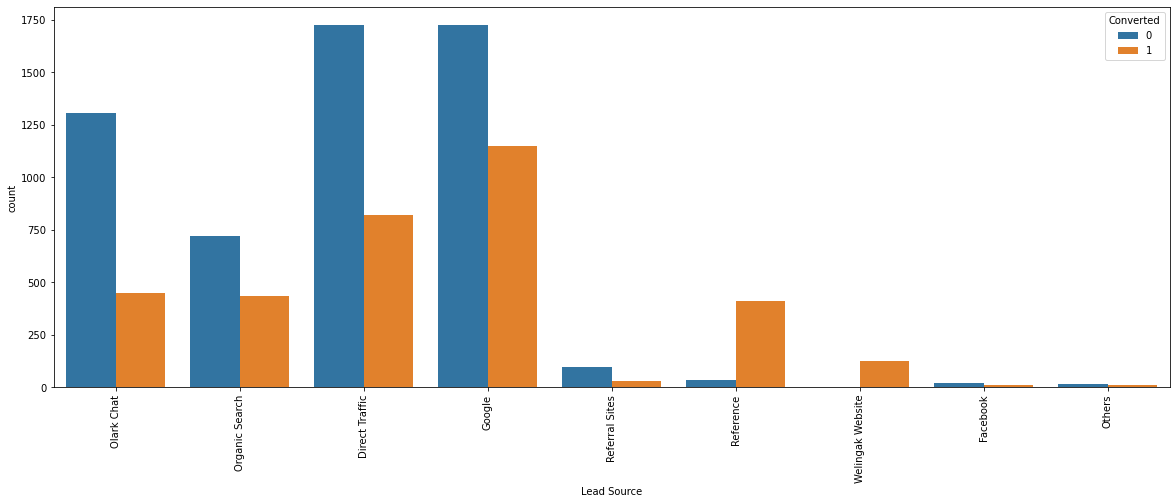

In [69]:
# To plot new categories
plot_cat_var(cat_var[1])

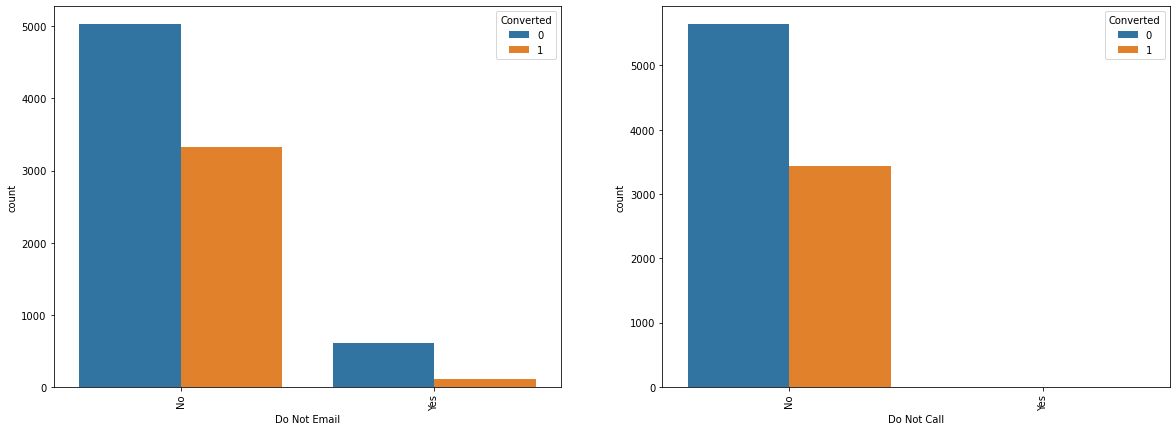

In [70]:
plot_cat_vars([cat_var[2],cat_var[3]])

Observations for **Do Not Email and Do Not Call** :

As one can expect, most of the responses are 'No' for both the variables which generated most of the leads.

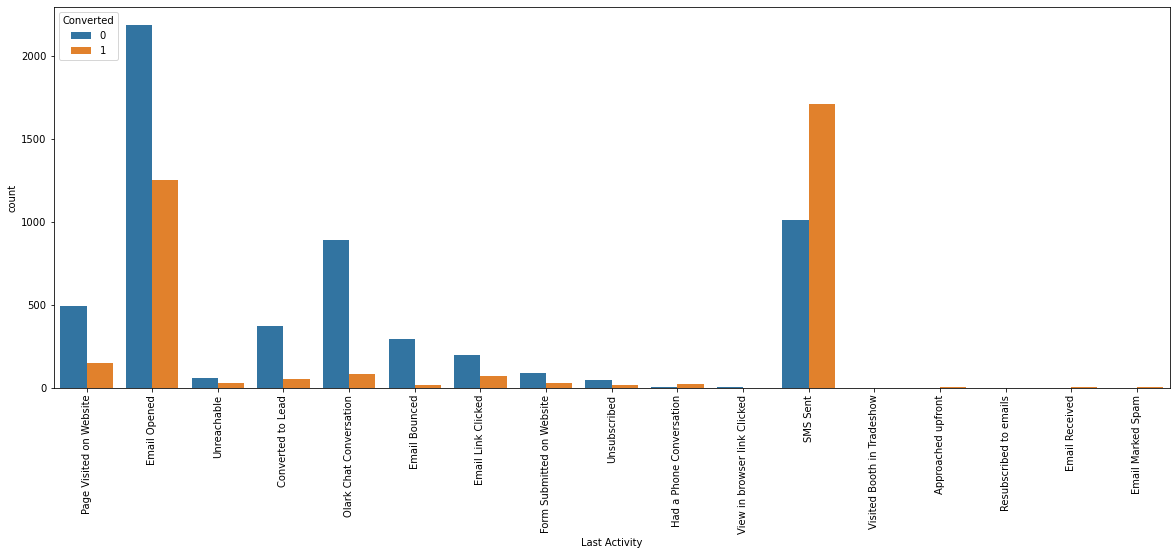

In [71]:
plot_cat_var('Last Activity')

Observations for **Last Activity :**

- Highest number of lead are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'. Its conversion rate is significantly high.
- Categories after the 'SMS Sent' have almost negligible effect. We can aggregate them all in one single category.

In [72]:
categories = df_leads['Last Activity'].unique()
categories

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

Convert last five categories to 'Others'

In [73]:
# To reduce categories
df_leads['Last Activity'] = df_leads['Last Activity'].replace(categories[-5:], 'Others')

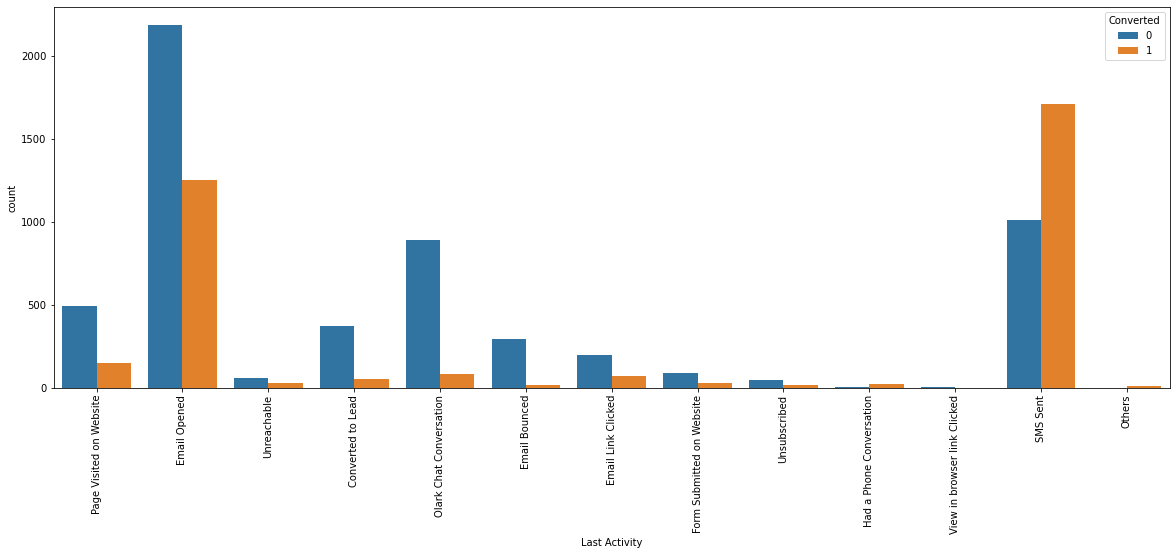

In [74]:
# To plot new categories
plot_cat_var('Last Activity')

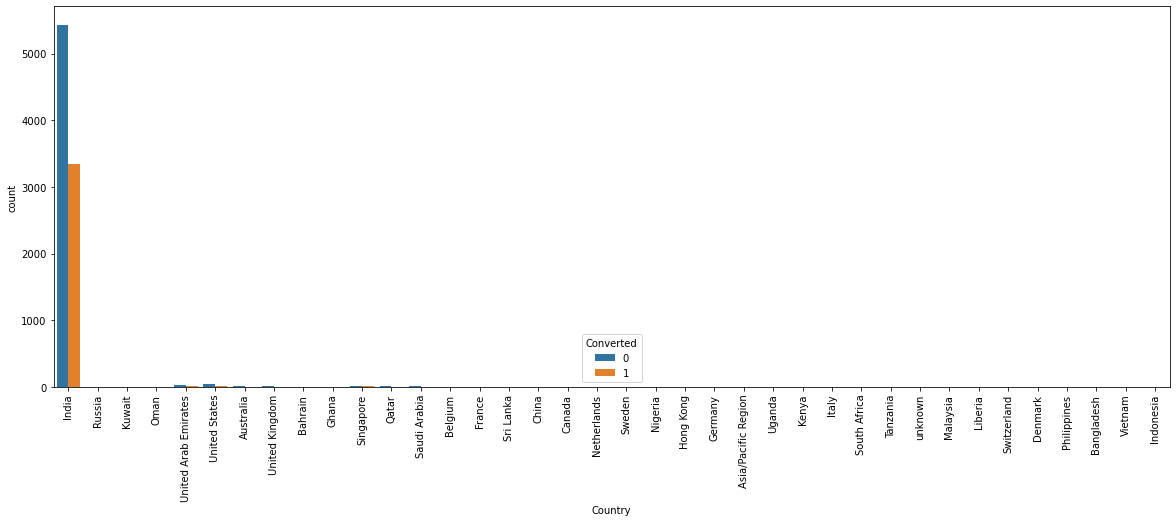

In [75]:
plot_cat_var(cat_var[5])

**Observation:**
- Most of the responses are for India. Others are not significant.

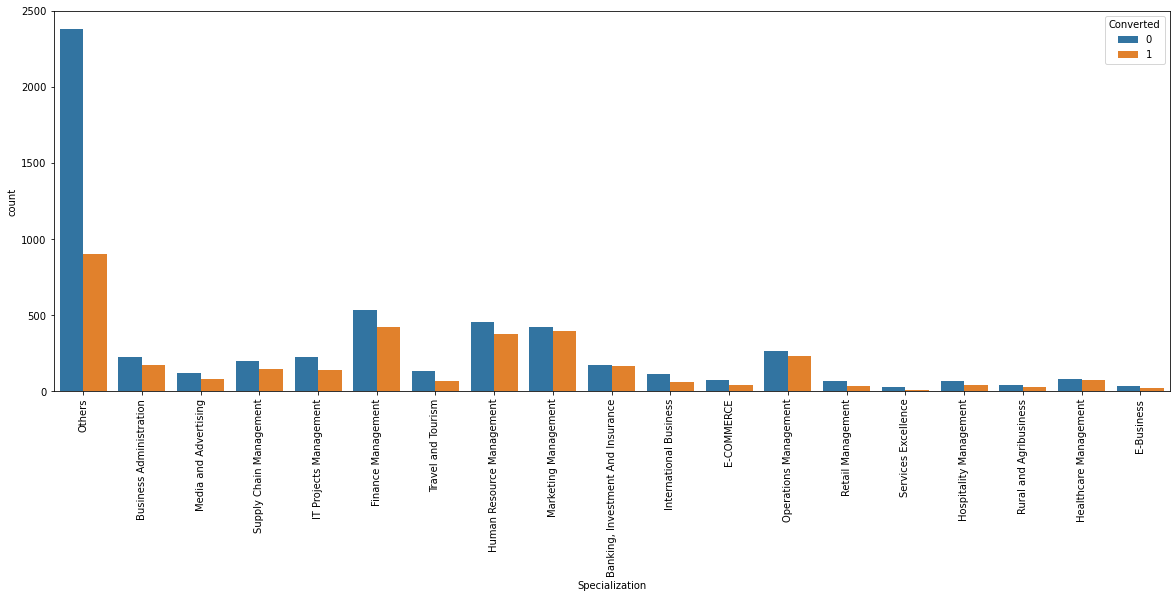

In [76]:
plot_cat_var(cat_var[6])

Observation for **Specialization:**
- Conversion rates are mostly similar across different specializations.

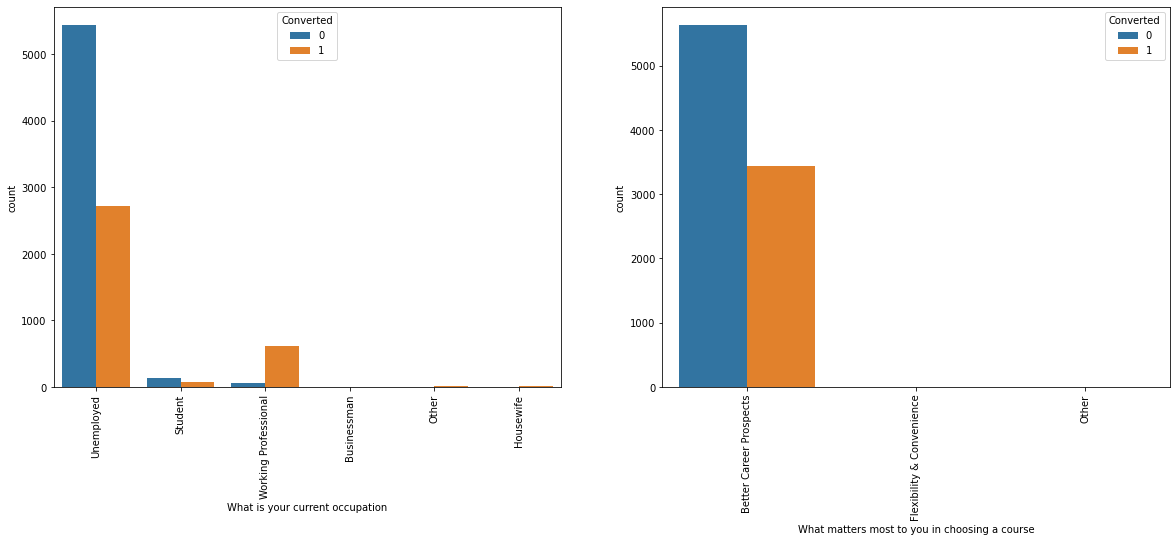

In [77]:
plot_cat_vars([cat_var[7],cat_var[8]])

**Observation for 'what is your current Occupation' and 'What matters most to you in choosing a course':**

- The highest conversion rate is for 'Working Professional'. High number of leads are generated for 'Unemployed' buy conversion rate is low.
- Variable 'What matters most to you in choosing a course' has only category with significant count.

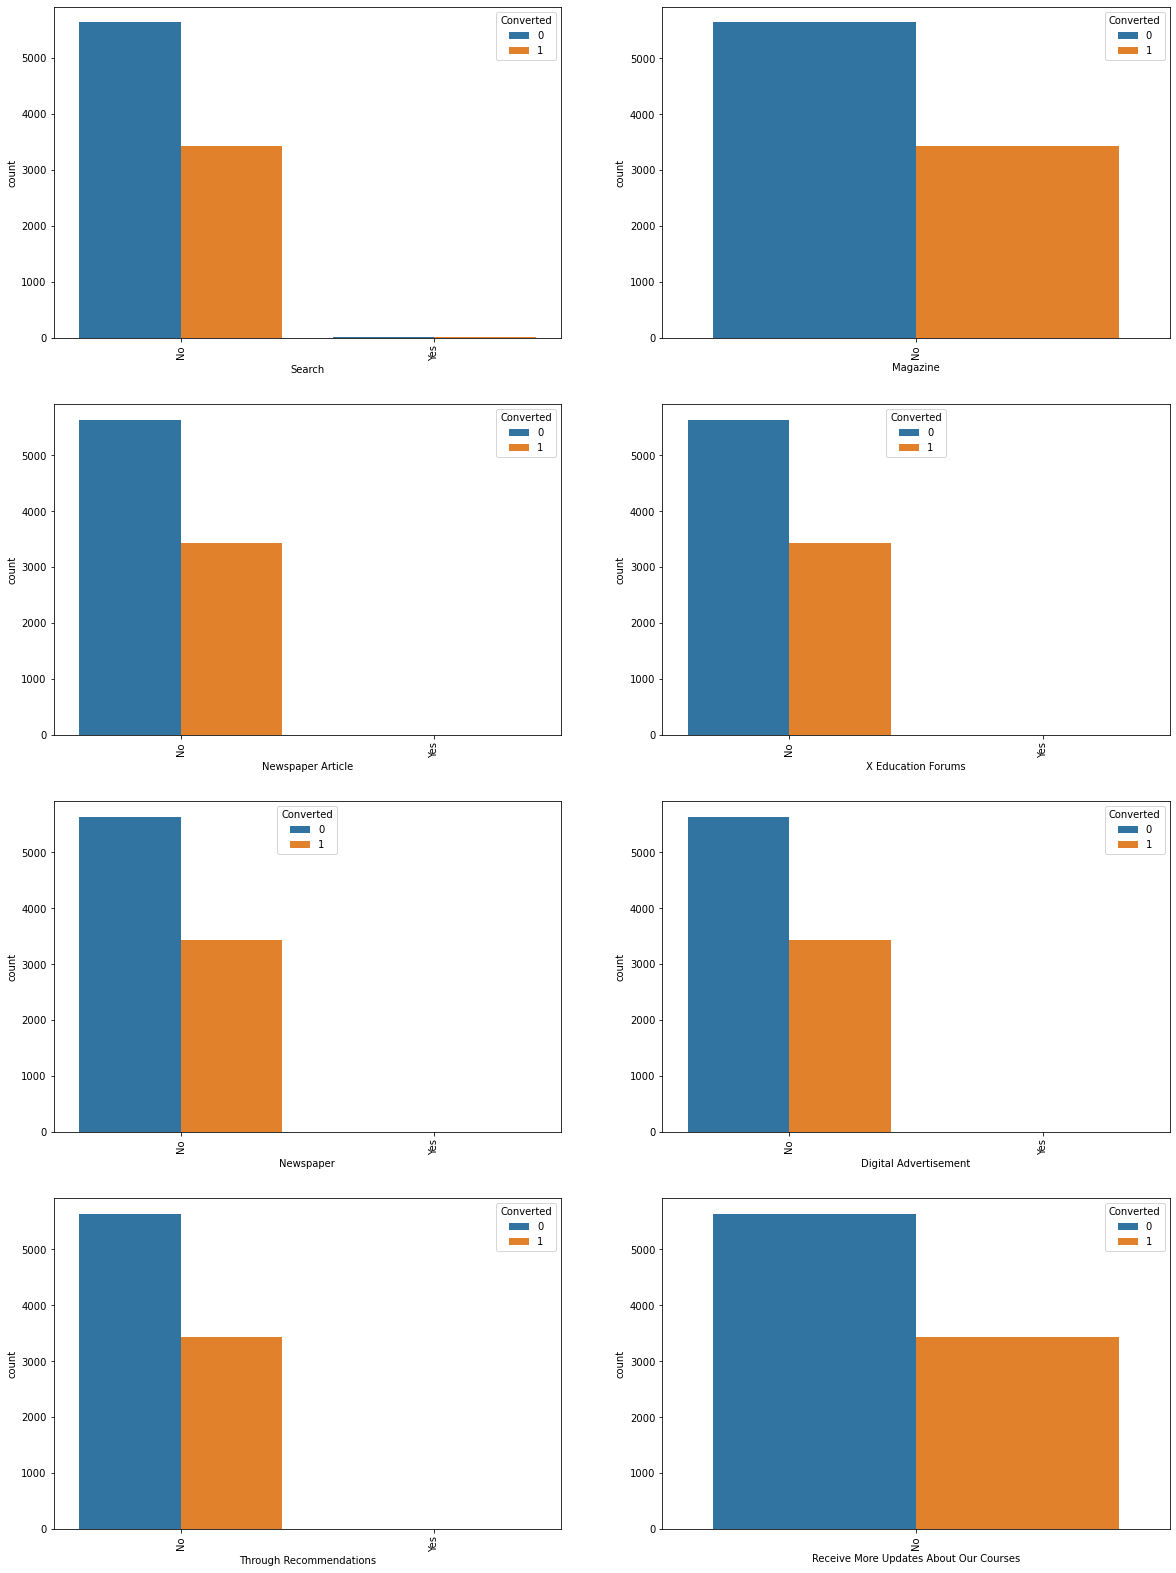

In [78]:
plot_cat_vars(cat_var[9:17])

Observations for **Search**, **Magazine**, **Newspaper Article**, **X Education Forums**, **Newspaper**, **Digital Advertisement**, **Through Recommendations**, and **Receive More Updates About Our Courses**: <br>
As all the above variables have most of the values as no, nothing significant can be inferred from these plots.

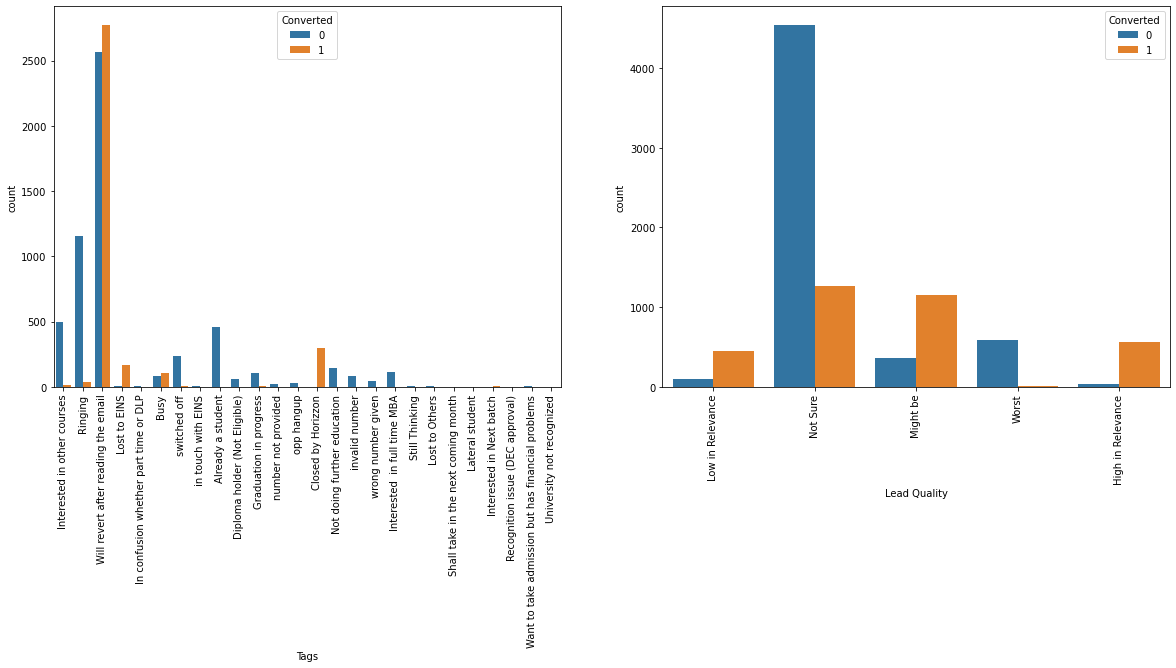

In [79]:
plot_cat_vars([cat_var[17],cat_var[18]])

Observations for **Tags** and **Lead Quality:**
- In Tags, categories after 'Interested in full time MBA' have very few leads generated, so we can combine them into one single category.
- Most leads generated and the highest conversion rate are bothe attributed to the tag 'Will revert after reading the email'
- In Lead quality, as expected, 'Might be' as the highest conversion rate while 'Wrost' has the lowest.

In [80]:
categories = df_leads['Tags'].unique()
categories

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

**Combine that last eight categories.**

In [81]:
# To reduce categories
df_leads['Tags'] = df_leads['Tags'].replace(categories[-8:], 'Others')

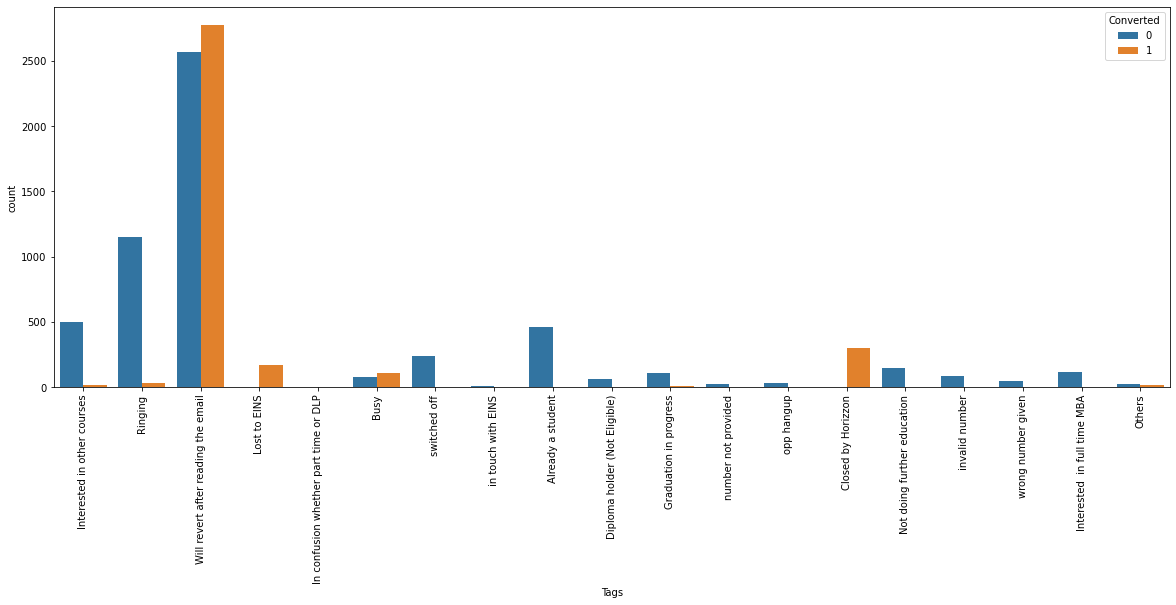

In [82]:
# To plot new categories
plot_cat_var(cat_var[17])

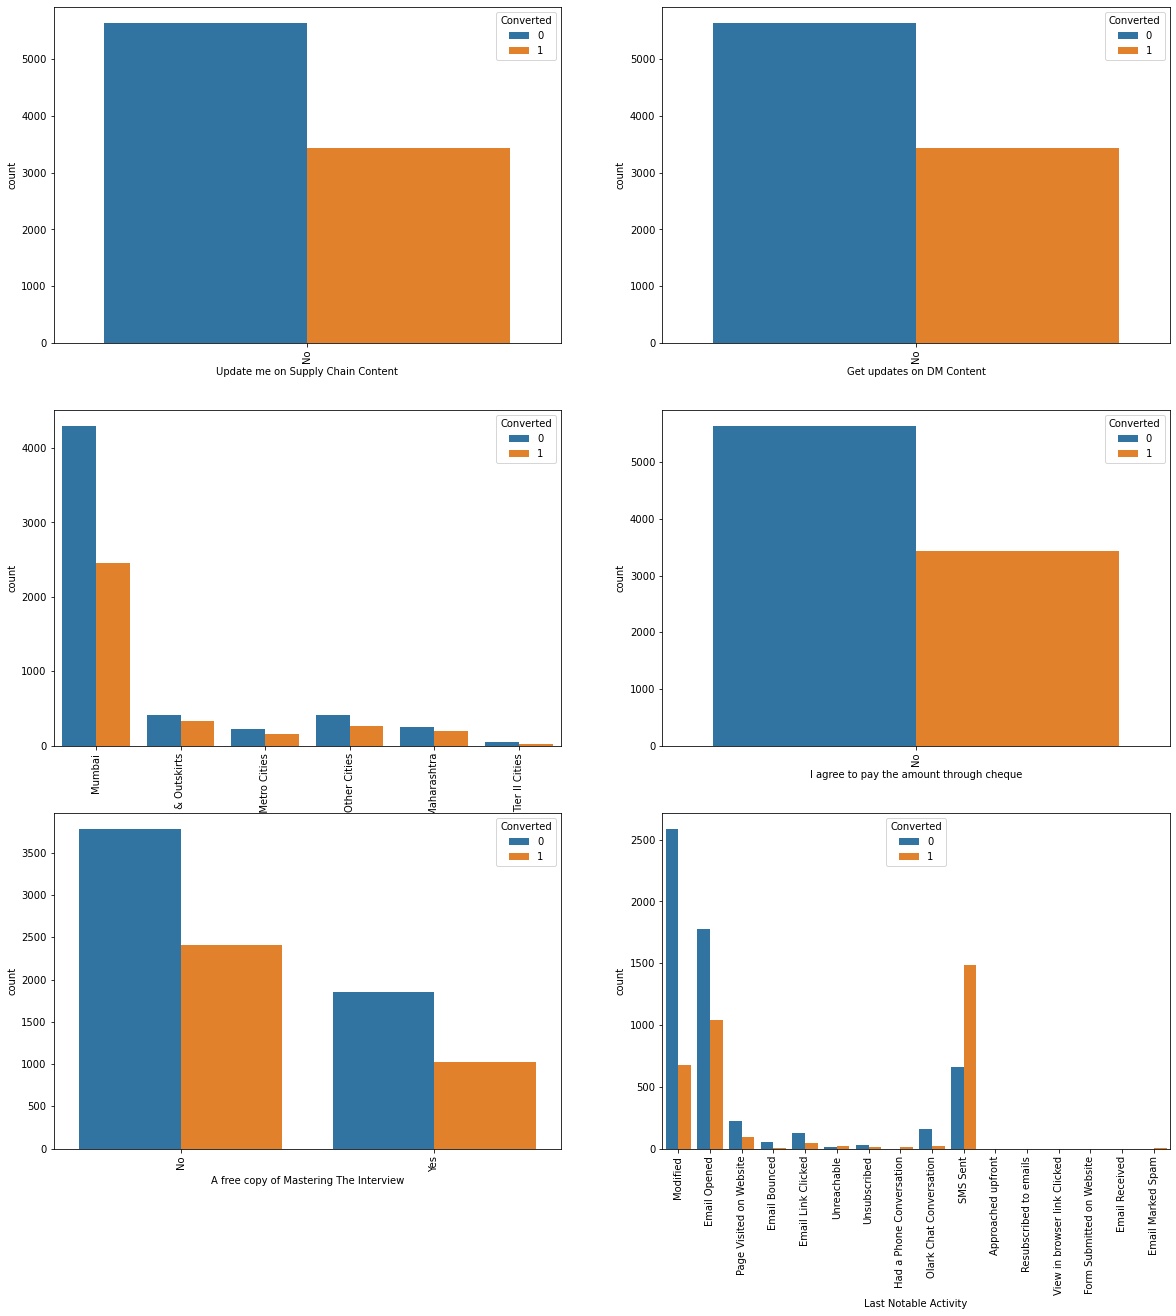

In [83]:
plot_cat_vars(cat_var[19:25])

Observations for **Update me on Supply Chain Content**, **Get updates on DM Content**, **City**, **I agree to pay the amount through cheque**, **A free copy of Mastering The Interview**, and **Last Notable Activity** : <br>
- Most of these variables are insignificant in analysis as many of them only have one significant category 'NO'.
- In City, most of the leads are generated for 'Mumbai'.
- In 'A free copy of Mastering The Interview', both categories have similar conversion rates.
- In 'Last Notable Activity', we can combine categories after 'SMS Sent' similar to the variable 'Last Activity'. It has most generated leads for the category 'Modified' while most conversion rate for 'SMS Sent' activity.

In [84]:
categories = df_leads['Last Notable Activity'].unique()
categories

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

**We can see that we do not require last six categories.**

In [85]:
# To reduce categories
df_leads['Last Notable Activity'] = df_leads['Last Notable Activity'].replace(categories[-6:], 'Others')

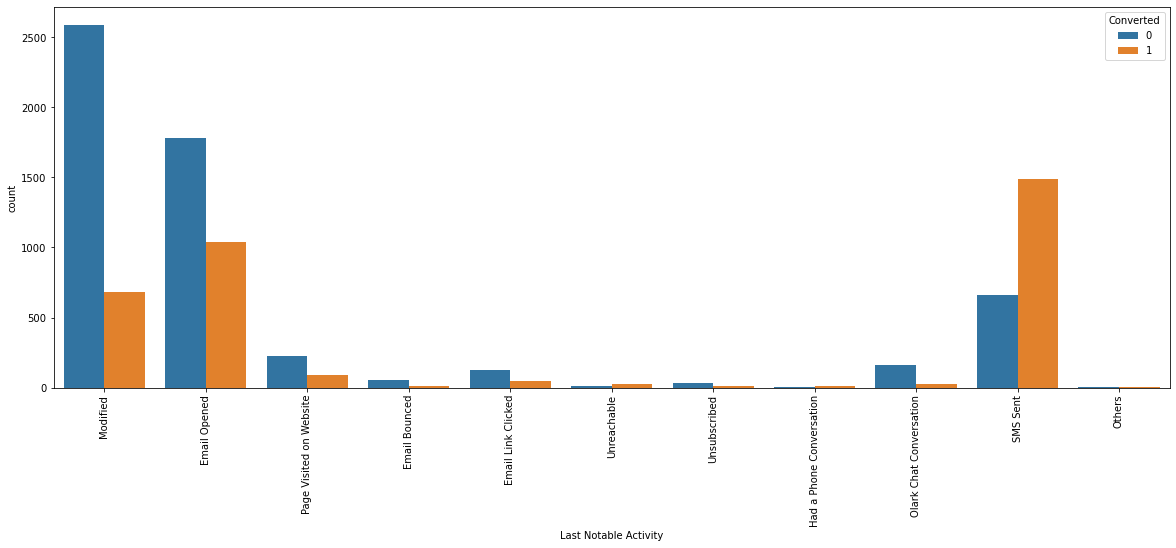

In [86]:
# To plot new categories
plot_cat_var(cat_var[24])

- Based on the data visualization, we can drop the variables which are not significant for analysis and will not any imformation to the model.

In [87]:
df_leads = df_leads.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                          'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                          'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                          'Get updates on DM Content','I agree to pay the amount through cheque',
                          'A free copy of Mastering The Interview'],1)

In [88]:
# Final dataframe
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [89]:
df_leads.shape

(9074, 14)

In [90]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Tags                             9074 non-null   object 
 11  Lead Quality                     9074 non-null   object 
 12  City                

In [91]:
df_leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.191867,482.887481,2.265943
std,0.485053,2.780618,545.256560,1.790991
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,10.000000,2272.000000,6.000000


# Data Preparation

In [92]:
# To convert binary variable (yes/no) to 0/1
df_leads['Do not Email'] = df_leads['Do Not Email'].map({'Yes': 1, 'No':0})

In [93]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Do not Email
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified,0


### Dummy Variable Creation

- For categorical variables with multiple levels, we create dummy features (one-hot encoded).

In [94]:
# Categorical variables
cat_var = list(df_leads.columns[df_leads.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [95]:
# To create dummy variables and drop first ones
dummy = pd.get_dummies(df_leads[cat_var], drop_first=True)

# To add result to the original dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

# To drop the original variables
df_leads = df_leads.drop(cat_var,1)

In [96]:
df_leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


# Train-Test Split

In [97]:
# Importing required package
from sklearn.model_selection import train_test_split

In [98]:
# To put feature variable to X
X = df_leads.drop(['Converted'],axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [99]:
# To put response variable to y
y = df_leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [100]:
# To split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [101]:
# Importing required package
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()

In [103]:
# Numerical variables
num_var

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [104]:
#Applying scaler to all numerical columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,-0.432779,-0.160255,-0.155018,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4750,-0.432779,1.643304,-0.155018,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0.643547,2.017593,0.122613,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [105]:
# To check the conversion rate
conversion = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
conversion

37.85541106458012

- **We have 37.85% conversion rate.**

# Building the Model

- After the creation of dummy variables, we have a large number of features. It is better to use RFE first for feature elimination.


### Feature Selection using RFE

In [106]:
# To create an instance of Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [107]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [108]:
# To check output of RFE
rfe.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False])

In [109]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 44),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 42),
 ('Do not Email', False, 22),
 ('Lead Origin_Landing Page Submission', False, 20),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Facebook', False, 50),
 ('Lead Source_Google', False, 47),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 48),
 ('Lead Source_Others', False, 49),
 ('Lead Source_Reference', False, 73),
 ('Lead Source_Referral Sites', False, 54),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', False, 60),
 ('Last Activity_Email Link Clicked', False, 40),
 ('Last Activity_Email Opened', False, 72),
 ('Last Activity_Form Submitted on Website', False, 74),
 ('Last Activity_Had a Phone Conversation', False, 13),
 ('Last Activity_Olark Chat Conversation', False, 17),
 ('Last Activity_Others', False, 34),
 ('Last Activity_Page Visite

In [110]:
# Features selected
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [111]:
# Features eliminated
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Do not Email', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       '

### Assessing the Model with StatsModels

In [112]:
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const',1)    # As we don't need constant
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [114]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [115]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [116]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

**Model 1**

Running the first model by using the features selected by RFE

In [117]:
X1, logm1 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.2
Date:                Tue, 18 Oct 2022   Deviance:                       3176.4
Time:                        09:38:39   Pearson chi2:                 3.57e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

`Tags_invalid number` has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

**Model 2**


In [118]:
col1 = col.drop('Tags_invalid number',1)

# To rebuild the model
X2, logm2 = build_model(X_train[col1],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1595.2
Date:                Tue, 18 Oct 2022   Deviance:                       3190.4
Time:                        09:38:39   Pearson chi2:                 3.49e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

`Tags_number not provided` has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

**Model 3**

In [119]:
col2 = col1.drop('Tags_number not provided',1)

# To rebuild the model
X3, logm3 = build_model(X_train[col2],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1598.7
Date:                Tue, 18 Oct 2022   Deviance:                       3197.4
Time:                        09:38:39   Pearson chi2:                 3.48e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

`Tags_wrong number given` has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

**Model 4**

In [120]:
col3 = col2.drop('Tags_wrong number given',1)

# To rebuild the model
X4, logm4 = build_model(X_train[col3],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.0
Date:                Tue, 18 Oct 2022   Deviance:                       3202.0
Time:                        09:38:39   Pearson chi2:                 3.48e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

- All of the features have p-value close to zero i.e. they all seem significant.

- **We also have to check VIFs (Variance Inflation Factors) of features to see if there's any multicollinearity present.**

In [121]:
check_VIF(X4)

,Features,VIF
1,Lead Source_Welingak Website,1.34
4,Tags_Closed by Horizzon,1.13
3,Tags_Busy,1.10
8,Tags_switched off,1.10
5,Tags_Lost to EINS,1.04
0,Lead Origin_Lead Add Form,0.65
2,Do Not Email_Yes,0.54
10,Lead Quality_Worst,0.37
9,Lead Quality_Not Sure,0.13
7,Tags_Will revert after reading the email,0.12


<AxesSubplot:>

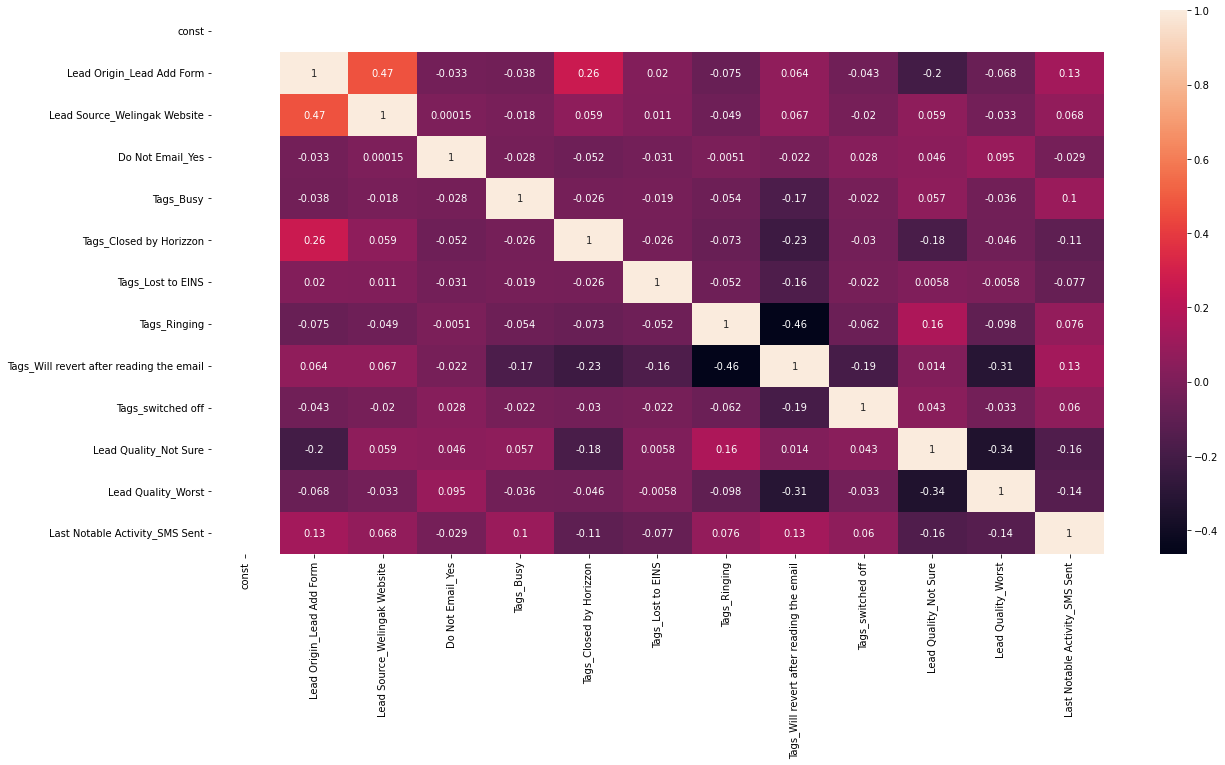

In [122]:
# To plot correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X4.corr(),annot = True)

From VIF values and heat maps, we can see that there is not much multicollinearity present. All variables have a good value of VIF. These features seem important from the business aspect as well. So we need not drop any more variables and we can proceed with making predictions using this model only.

In [123]:
# To get predicted values on train set
y_train_pred_final = get_pred(X4,logm4)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.189946,3009,0
1,0,0.061006,1012,0
2,0,0.000707,9226,0
3,1,0.784007,4750,1
4,1,0.977108,7987,1


In [124]:
# Confusion Matrix and accuracy
confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3751  154]
 [ 357 2089]]
Training Accuracy:  0.9195402298850575


| Predicted/Actual | Not converted Leads | Converted Leads |
| --- | --- | --- |
| Not converted Leads | 3751 | 154 |
| Converted Leads | 357 | 2089 |

This is our **final model:**

1. All p-values are very close to zero.
2. VIFs for all features are very low. There is hardly any multicollinearity present.
3. Training accuracy of **91.95%** at a probability threshold of 0.05 is also very good.

# Metrics beyond simply Accuracy

In [125]:
other_metrics(confusion)

Sensitivity:  0.8540474243663123
Specificity:  0.9605633802816902
False postive rate - predicting the lead conversion when the lead does not convert:  0.03943661971830986
Positive predictive value:  0.9313419527418636
Negative predictive value:  0.9130963972736125


# Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [126]:
# Function to plot ROC
def plot_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [127]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

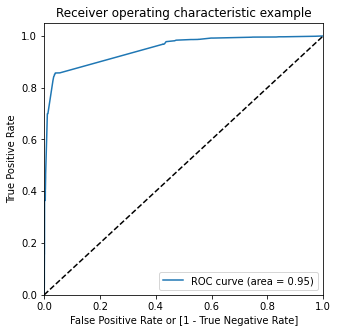

In [128]:
# To plot ROC
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [129]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

Area under curve:  0.9487586935423588


**Area under curve (auc) is approximately 0.95 which is very close to ideal auc of 1.**

# Finding Optimal Cutoff Point

Optimal cutoff probability is the prob where we get balanced sensitivity and specificity.

In [130]:
# To create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1


In [131]:
# To calculate accuracy, sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.706503  0.981194  0.534443
0.2   0.2  0.911195  0.857318  0.944942
0.3   0.3  0.919383  0.856909  0.958515
0.4   0.4  0.920170  0.856092  0.960307
0.5   0.5  0.919540  0.854047  0.960563
0.6   0.6  0.920170  0.851594  0.963124
0.7   0.7  0.918753  0.843827  0.965685
0.8   0.8  0.876397  0.700327  0.986684
0.9   0.9  0.790742  0.464841  0.994878


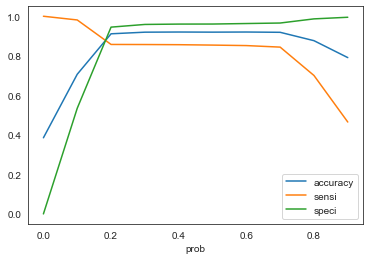

In [132]:
# To plot accuracy, sensitivity and specificity for various probabilities
sns.set_style('white')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, **0.2 is the optimum point to take as a cutoff probability.**

In [133]:
# Using 0.2 threshold for predictions
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [134]:
# Confusion matrix and Overall Accuracy
confusion2 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

Confusion Matrix:
[[3750  155]
 [ 352 2094]]
Training Accuracy:  0.9201700519603212


In [135]:
# Other metrics
other_metrics(confusion2)

Sensitivity:  0.8560915780866721
Specificity:  0.9603072983354674
False postive rate - predicting the lead conversion when the lead does not convert:  0.03969270166453265
Positive predictive value:  0.9310804802134282
Negative predictive value:  0.9141882008776206


### Classification Report

In [136]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3905
           1       0.93      0.86      0.89      2446

    accuracy                           0.92      6351
   macro avg       0.92      0.91      0.91      6351
weighted avg       0.92      0.92      0.92      6351



# Precision and Recall

**Precision = TP / TP + FP**

In [137]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9313419527418636

**Recall = TP / TP + FN**

In [138]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8540474243663123

Using sklearn utilities for the same:

In [139]:
from sklearn.metrics import precision_score, recall_score

In [140]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9313419527418636

In [141]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8540474243663123

# Precision and Recall Tradeoff

In [142]:
from sklearn.metrics import precision_recall_curve

In [143]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [144]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

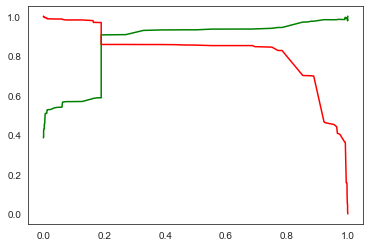

In [145]:
# To plot precision vs recall for different thresholds
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the curve above, **0.25 is the optimum point to take as a cutoff probability using Precision-Recall**. We can check our accuracy using this cutoff too.

In [146]:
# Using 0.25 threshold for predictions
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1,1
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [147]:
# Confusion matrix and overall accuracy
confusion3 = conf_mat(y_train_pred_final.Converted,y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[3690  215]
 [ 349 2097]]
Training Accuracy:  0.911195087387813


In [148]:
# Other metrics
other_metrics(confusion3)

Sensitivity:  0.857318070318888
Specificity:  0.9449423815620999
False postive rate - predicting the lead conversion when the lead does not convert:  0.05505761843790013
Positive predictive value:  0.9070069204152249
Negative predictive value:  0.9135924733845011


Accuracy and other metrics yield similar values for both the cutoffs. We'll use the cutoff of 0.2 as derived earlier for predictions on the test set.

### **Final Result on Train Set :**

| Data | Train Set |
| --- | --- |
| Accuracy | 0.9111 |
| Sensitivity | 0.8573 |
| Specificity | 0.9449 |
| False Positive Rate | 0.0550 |
| Positive predictive value | 0.9070 | 
| Negetive Predictive value | 0.9135 |
| AUC | 0.9488 |

# Making Prediction on the Test Set

In [149]:
# Feature transform on Test set
X_test[num_var] = scaler.fit_transform(X_test[num_var])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do not Email,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3271,0.304501,-0.591008,0.998931,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1490,0.666261,1.894051,1.564920,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7936,-0.419021,-0.743117,-0.133048,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4216,-1.142542,-0.878732,-1.265027,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3830,1.751544,-0.578179,2.130909,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [150]:
# To get final features
X_test_sm = X_test[col3]

In [151]:
# To add a constant
X_test_sm = sm.add_constant(X_test_sm)

In [152]:
# Making predictions
y_test_pred = logm4.predict(X_test_sm)

y_test_pred[:10]

3271    0.189946
1490    0.888099
7936    0.189946
4216    0.999300
3830    0.189946
1800    0.888099
6507    0.010841
4821    0.000376
4223    0.997563
4714    0.189946
dtype: float64

In [153]:
# To convert y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
3271,0.189946
1490,0.888099
7936,0.189946
4216,0.999300
3830,0.189946


In [154]:
# To convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [155]:
# Putting Lead ID to index
y_test_df['Lead ID'] = y_test_df.index

In [156]:
# To remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
# To append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.189946
1,1,1490,0.888099
2,0,7936,0.189946
3,1,4216,0.999300
4,0,3830,0.189946


In [158]:
# To Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

y_pred_final.head()

,Converted,Lead ID,Converted_prob
0,0,3271,0.189946
1,1,1490,0.888099
2,0,7936,0.189946
3,1,4216,0.999300
4,0,3830,0.189946


In [159]:
# To put the threshold of 0.2 as derived
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

y_pred_final.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.189946,0
1,1,1490,0.888099,1
2,0,7936,0.189946,0
3,1,4216,0.999300,1
4,0,3830,0.189946,0


In [160]:
print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Converted, y_pred_final.Converted_prob))

Area under curve:  0.9388647090311768


In [161]:
# Confusion matrix and overall accuracy
confusion_test = conf_mat(y_pred_final.Converted,y_pred_final.final_predicted)

Confusion Matrix:
[[1640   94]
 [ 157  832]]
Training Accuracy:  0.9078222548659567


| Predicted/Actual | Not converted Leads | Converted Leads |
| --- | --- | --- |
| Not converted Leads | 1640 | 94 |
| Converted Leads | 157 | 832 |

In [162]:
# Other metrics
other_metrics(confusion_test)

Sensitivity:  0.8412537917087968
Specificity:  0.9457900807381776
False postive rate - predicting the lead conversion when the lead does not convert:  0.05420991926182238
Positive predictive value:  0.8984881209503239
Negative predictive value:  0.9126321647189761


### **Final Result on Test set :**

| Data | Test Set |
| --- | --- |
| Accuracy | 0.9078 |
| Sensitivity | 0.8412 |
| Specificity | 0.9457 |
| False Positive Rate | 0.0542 |
| Positive predictive value | 0.8984 | 
| Negetive Predictive value | 0.9126 |
| AUC | 0.9388 |

### Classification Report

In [163]:
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1734
           1       0.90      0.84      0.87       989

    accuracy                           0.91      2723
   macro avg       0.91      0.89      0.90      2723
weighted avg       0.91      0.91      0.91      2723



# Assigning Lead Score

Lead Score = 100 * ConversionProbability <br>
This needs to be calculated for all the leads from the original dataset (train + test).

In [164]:
# To select test set
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,Lead ID,Converted_prob,final_predicted
0,0,3271,0.189946,0
1,1,1490,0.888099,1
2,0,7936,0.189946,0
3,1,4216,0.999300,1
4,0,3830,0.189946,0


In [165]:
# To select train set
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.189946,3009,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.061006,1012,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.000707,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.784007,4750,1,1,1,1,1,1,1,1,1,0,0,1,1
4,1,0.977108,7987,1,1,1,1,1,1,1,1,1,1,1,1,1


In [166]:
# To drop unnecessary columns from train set
leads_train_pred = leads_train_pred[['Lead ID','Converted','Converted_prob','final_predicted']]
leads_train_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.189946,0
1,1012,0,0.061006,0
2,9226,0,0.000707,0
3,4750,1,0.784007,1
4,7987,1,0.977108,1


In [167]:
# To concatenate 2 datasets
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted
0,3009,0,0.189946,0
1,1012,0,0.061006,0
2,9226,0,0.000707,0
3,4750,1,0.784007,1
4,7987,1,0.977108,1


In [168]:
# To inspect the shape of the final dataset
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6351, 4)
(2723, 4)
(9074, 4)


In [169]:
# To ensure uniqueness of Lead IDs
len(lead_full_pred['Lead ID'].unique().tolist())

9074

In [170]:
# To calculate the Lead Score
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Lead ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3009,0,0.189946,0,19
1,1012,0,0.061006,0,6
2,9226,0,0.000707,0,0
3,4750,1,0.784007,1,78
4,7987,1,0.977108,1,98


In [171]:
# To make the Lead ID column as index
lead_full_pred = lead_full_pred.set_index('Lead ID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_prob,final_predicted,Lead_Score
Lead ID,,,,
0,0,0.127953,0,13
1,0,0.000707,0,0
2,1,0.888099,1,89
3,0,0.000707,0,0
4,1,0.888099,1,89


In [172]:
# To get Lead Number column from original data
leads_original = df_leads_original[['Lead Number']]
leads_original.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


In [173]:
# To concatenate the 2 dataframes based on index
leads_with_score = pd.concat([leads_original, lead_full_pred], axis=1)
leads_with_score.head()

,Lead Number,Converted,Converted_prob,final_predicted,Lead_Score
0,660737,0.0,0.127953,0.0,13.0
1,660728,0.0,0.000707,0.0,0.0
2,660727,1.0,0.888099,1.0,89.0
3,660719,0.0,0.000707,0.0,0.0
4,660681,1.0,0.888099,1.0,89.0


We have a new data frame consisting of Lead Number and Lead Score. Lead Number will help in easy referencing with the original data.

### Determining Feature Importance

In [174]:
# To display features with corrsponding coefficients in final model
pd.options.display.float_format = '{:.2f}'.format
new_params = logm4.params[1:]
new_params

Lead Origin_Lead Add Form                   1.20
Lead Source_Welingak Website                3.28
Do Not Email_Yes                           -1.28
Tags_Busy                                   3.80
Tags_Closed by Horizzon                     7.98
Tags_Lost to EINS                           9.19
Tags_Ringing                               -1.81
Tags_Will revert after reading the email    3.99
Tags_switched off                          -2.45
Lead Quality_Not Sure                      -3.52
Lead Quality_Worst                         -3.91
Last Notable Activity_SMS Sent              2.74
dtype: float64

In [175]:
# Relative feature importance
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Origin_Lead Add Form                   13.09
Lead Source_Welingak Website                35.70
Do Not Email_Yes                           -13.96
Tags_Busy                                   41.37
Tags_Closed by Horizzon                     86.78
Tags_Lost to EINS                          100.00
Tags_Ringing                               -19.71
Tags_Will revert after reading the email    43.40
Tags_switched off                          -26.60
Lead Quality_Not Sure                      -38.30
Lead Quality_Worst                         -42.53
Last Notable Activity_SMS Sent              29.79
dtype: float64

In [176]:
# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Origin_Lead Add Form                   10
Lead Source_Welingak Website                 9
Do Not Email_Yes                             8
Tags_Busy                                    6
Tags_Closed by Horizzon                      2
Tags_Lost to EINS                            0
Tags_Ringing                                11
Tags_Will revert after reading the email     1
Tags_switched off                            3
Lead Quality_Not Sure                        7
Lead Quality_Worst                           4
Last Notable Activity_SMS Sent               5
dtype: int64

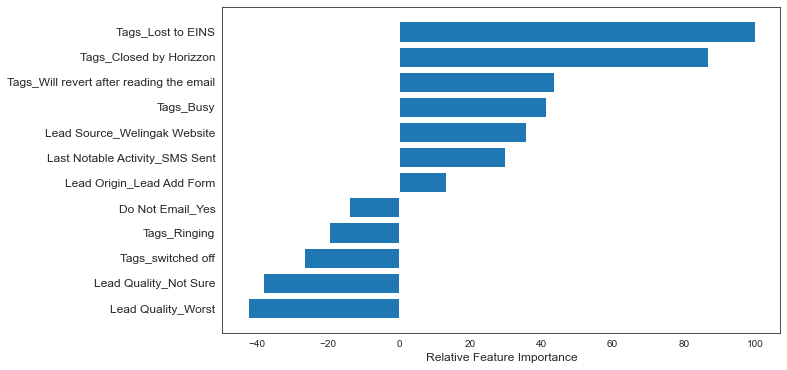

In [177]:
# To plot features with their relative importance
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col3].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

# Conclusion

After trying out saveral models, our final model has following characteristics:
1. All p-values are very close to zero.
2. VIFs for all features are very low. There is hardly any multicollinearity present.
3. The overall testing accuracy of **90.78%** at a probability threshold of 0.05 is also very good.

|Dataset|Accuracy|Sensitivity|Specificity|False Positive Rate|Positive Predictive Value|Negative Predictive Value|AUC|
|-----|-----|-----|-----|-----|-----|-----|-----|
|Train|0.9111|0.8573|0.9449|0.0550|0.9070|0.9135|0.9488|
|Test|0.9078|0.8412|0.9457|0.0542|0.8984|0.9126|0.9388|

The **optimal threshold** for the model is **0.20** which is calculated based on tradeoff between sensitivity, specificity and accuracy. According to business needs, this threshold can be changed to increase or decrease a specific metric. <br>

High sensitivity ensures that most of the leads who are likely to convert are correctly predicted, while high specificity ensures that most of the leads who are not likely to convert are correctly predicted.

**Twelve features** were selected as the most significant in predicting the conversion:
- Features having **positive impact** on conversion probability in **decreasing order** of impact:

|Features with Positive Coefficient Values|
|---------------|
|Tags_Lost to EINS|
|Tags_Closed by Horizzon|
|Tags_Will revert after reading the email|
|Tags_Busy|
|Lead Source_Welingak Website|
|Last Notable Activity_SMS Sent|
|Lead Origin_Lead Add Form|

- Features having **negative impact** on conversion probability in **decreasing order** of impact:

|Features with Negative Coefficient Values|
|----------|
|Lead Quality_Worst|
|Lead Quality_Not Sure|
|Tags_switched off|
|Tags_Ringing|
|Do Not Email|